# Calculation of the monthly mean values and anomalies - Issue

**It can be seen that for the two datasets FOCI and CESM we get not perfectly 0 values for the temporal mean of the anomalies using the monthly_mean_unweighted and monthly_mean_weighted functions from the reduction.py file.**

Should dicsuss this, as this is needed to calculate ENSO index

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from climate_index_collection.reductions import monthly_mean_weighted, monthly_mean_unweighted
from climate_index_collection.reductions import monthly_anomalies_weighted, monthly_anomalies_unweighted
from climate_index_collection.data_loading import load_data_set

In [9]:
CESM_DATA = load_data_set(data_path="../data/test_data/", data_source_name="CESM")
FOCI_DATA = load_data_set(data_path="../data/test_data/", data_source_name="FOCI")

ano_weight_CESM, ano_unweight_CESM = monthly_anomalies_weighted(CESM_DATA), monthly_anomalies_unweighted(CESM_DATA)
ano_weight_FOCI, ano_unweight_FOCI = monthly_anomalies_weighted(FOCI_DATA), monthly_anomalies_unweighted(FOCI_DATA)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.arr

In [10]:
def plot_anomalies_hist(ma_w, ma_u) :
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 7))
    hist_kwargs = dict(bins = 26)

    for ii, key in enumerate(ma_w.keys()) :
        ma_w[key].plot.hist(ax = axes[0][ii], **hist_kwargs)
        axes[0][ii].set_title(key + ' weighted')
        ma_u[key].plot.hist(ax = axes[1][ii], **hist_kwargs)
        axes[1][ii].set_title(key + ' unweighted')
    for ax in axes.flatten():
        ax.set_xlabel('')

    return fig

def plot_anomalies_map(ma_w, ma_u) :
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 7))
    for ii, key in enumerate(ma_w.keys()) :
        ma_w[key].plot(ax = axes[0][ii])
        axes[0][ii].set_title(key + ' weighted')
        ma_u[key].plot(ax = axes[1][ii])
        axes[1][ii].set_title(key + ' unweighted')
    for ax in axes.flatten():
        ax.set_xlabel('')

    return fig

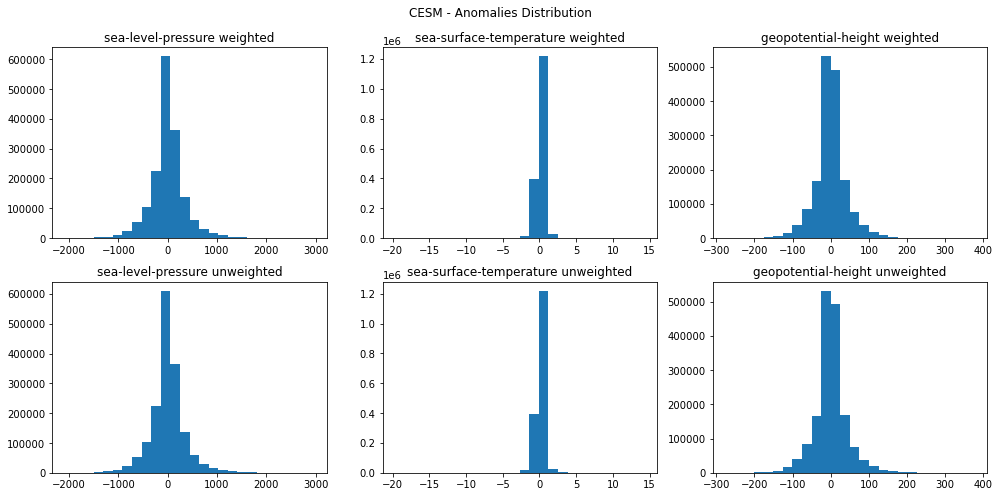

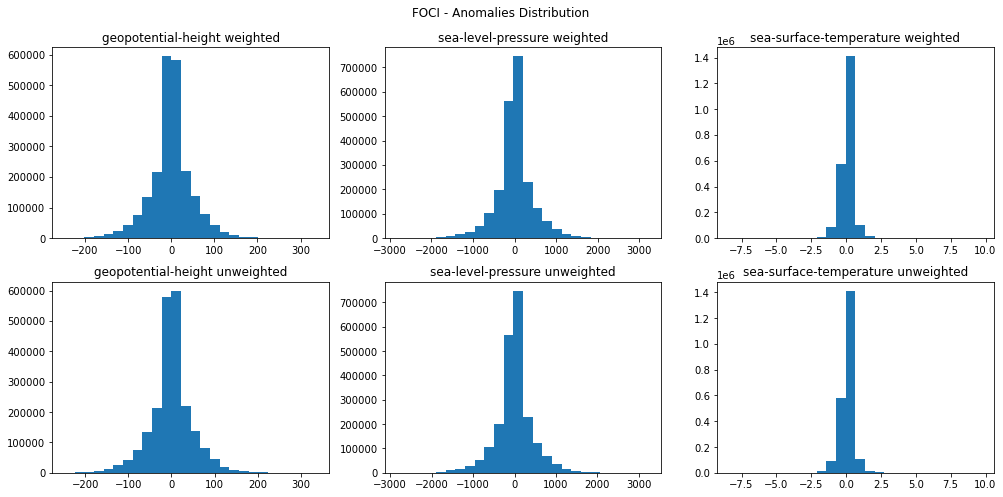

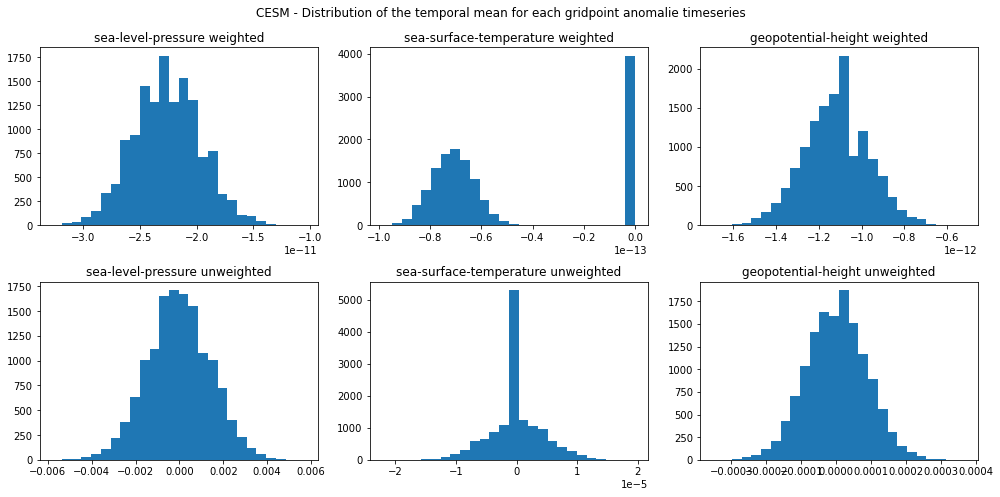

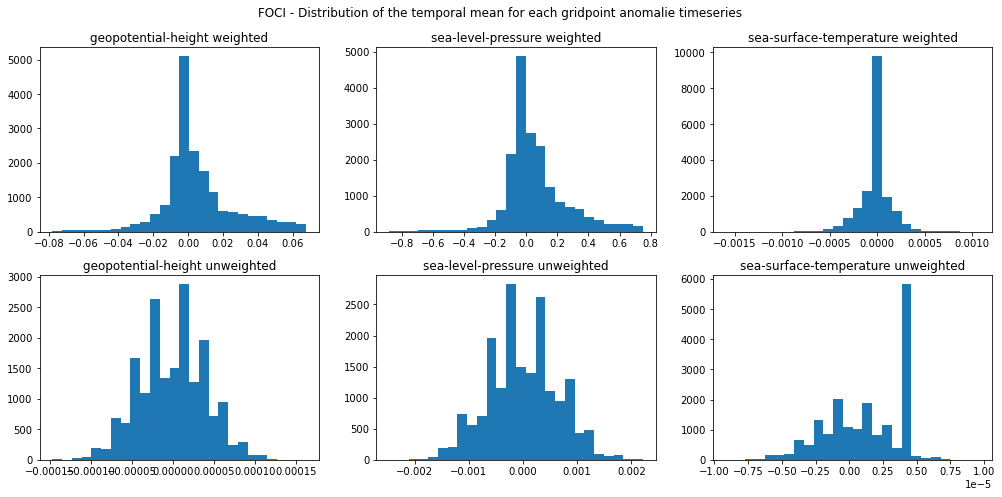

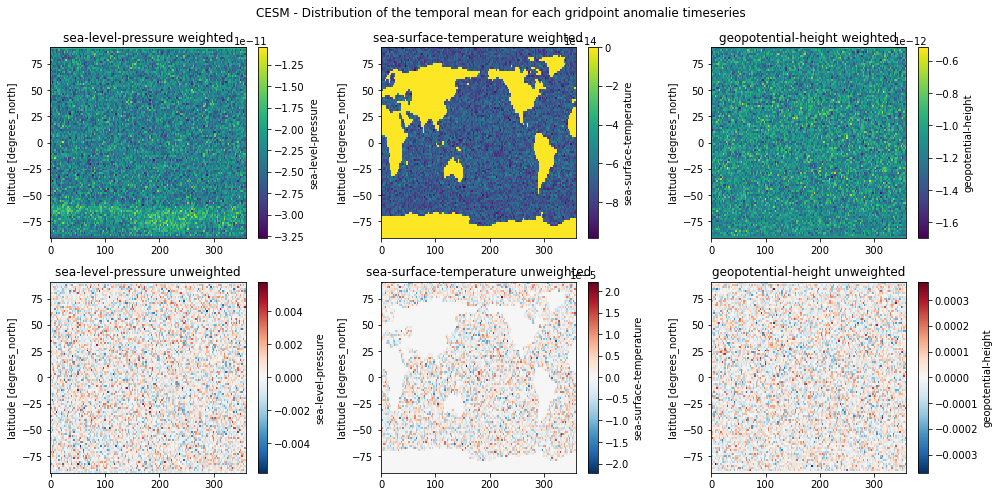

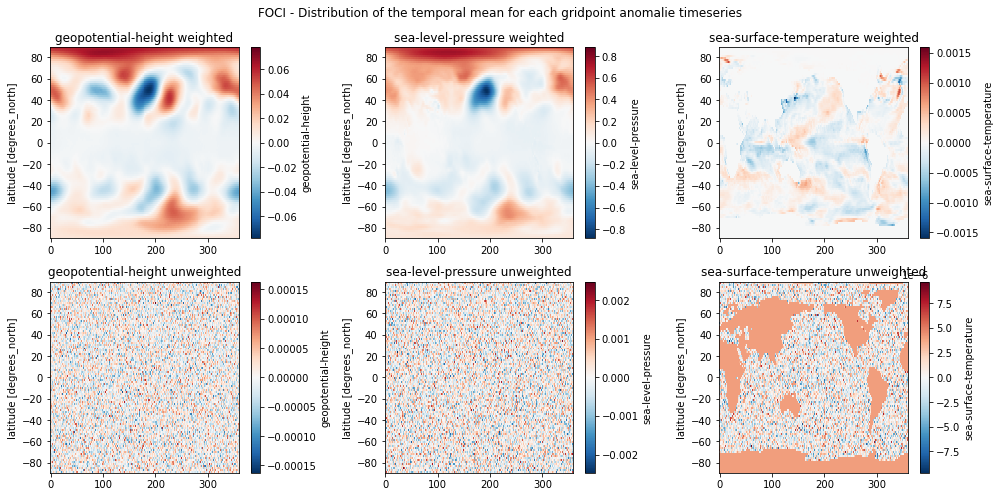

In [13]:
# -------
# Anomalies Distribution
# -------
#plot data for CESM:
fig_CESM = plot_anomalies_hist(ano_weight_CESM, ano_unweight_CESM)
fig_CESM.suptitle('CESM - Anomalies Distribution')
fig_CESM.tight_layout()
#plot data for FOCI:
fig_FOCI = plot_anomalies_hist(ano_weight_FOCI, ano_unweight_FOCI)
fig_FOCI.suptitle('FOCI - Anomalies Distribution')
fig_FOCI.tight_layout()

# -------
# Distribution of the temporal mean for each gridpoint anomalie timeseries
# -------
#plot data for CESM:
fig_CESM = plot_anomalies_hist(ano_weight_CESM.mean('time'), ano_unweight_CESM.mean('time'))
fig_CESM.suptitle('CESM - Distribution of the temporal mean for each gridpoint anomalie timeseries')
fig_CESM.tight_layout()
#plot data for FOCI:
fig_FOCI = plot_anomalies_hist(ano_weight_FOCI.mean('time'), ano_unweight_FOCI.mean('time'))
fig_FOCI.suptitle('FOCI - Distribution of the temporal mean for each gridpoint anomalie timeseries')
fig_FOCI.tight_layout()
# ---
# Also plot maps
# ---
#plot data for CESM:
fig_CESM = plot_anomalies_map(ano_weight_CESM.mean('time'), ano_unweight_CESM.mean('time'))
fig_CESM.suptitle('CESM - Distribution of the temporal mean for each gridpoint anomalie timeseries')
fig_CESM.tight_layout()
#plot data for FOCI:
fig_FOCI = plot_anomalies_map(ano_weight_FOCI.mean('time'), ano_unweight_FOCI.mean('time'))
fig_FOCI.suptitle('FOCI - Distribution of the temporal mean for each gridpoint anomalie timeseries')
fig_FOCI.tight_layout()